In [2]:
import os
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Domain coloring basics

In [27]:
def create_domain(xy, N):
    """
    Create coordinate system for an arbitrary complex domain,
    """
    X = np.linspace(-xy, xy, N)
    Y = np.linspace(-xy, xy, N)
    X, Y = np.meshgrid(X, Y)
    
    return X + 1j*Y

def normalize(arr):
    """
    Normalize data based on their min/max values.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    arr = arr - arr_min
    return arr / (arr_max - arr_min)

def create_color_model(zz):
    """
    Create the HSV color model for the function domain that will be plotted.
    """
    # Hue determined by arg(zz)
    H = normalize(np.angle(zz) % (2 * np.pi))
    r = np.log2(1 + np.abs(zz))
    S = 2 / np.pi * np.arctan(r)
    V = 2 / np.pi * np.arctan(r)

    return H,S,V

In [28]:
# Create domain for plot
zz = create_domain(xy=3, N=1000)
# Create HSV map
H,S,V = create_color_model(zz=zz)
# Convert to RGB
rgb = hsv_to_rgb(np.dstack((H,S,V)))

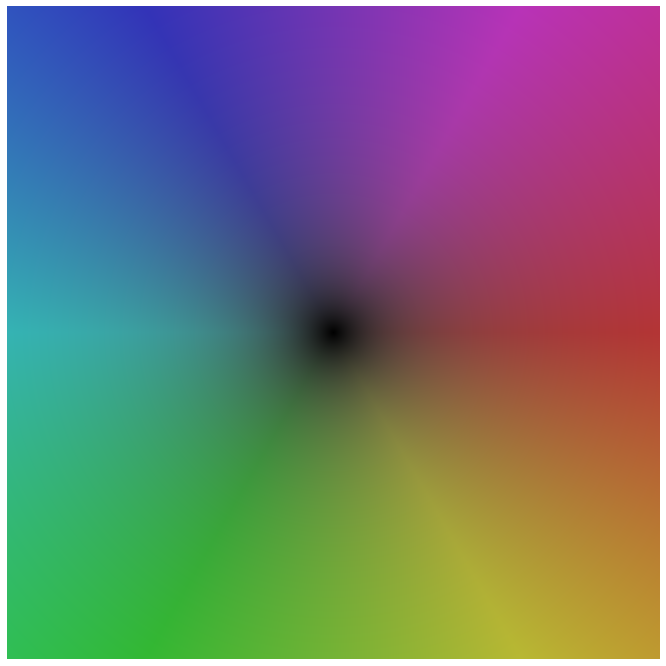

In [29]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_aspect('equal')
axes.axis('off')
axes.invert_yaxis()

axes.imshow(rgb)

plt.show()

## Domain coloring function

In [41]:
# Create domain for plot
zz = create_domain(xy=3, N=1000)
# Calculate function values
#zz = zz**5 - 1
#zz = np.log(zz)
#zz = (zz**2 - 1j) / (2*zz**2 + 2j)
#zz = (zz - 2)**2 * (zz + 1 - 2j) * (zz + 2 - 2j) / zz**3
zz = ((zz**2 - 1) * (zz - 2 - 1j)**2) / (zz**2 + 2 + 2j)

# Create HSV map
H,S,V = create_color_model(zz)
# Convert to RGB
rgb = hsv_to_rgb(np.dstack((H,S,V)))

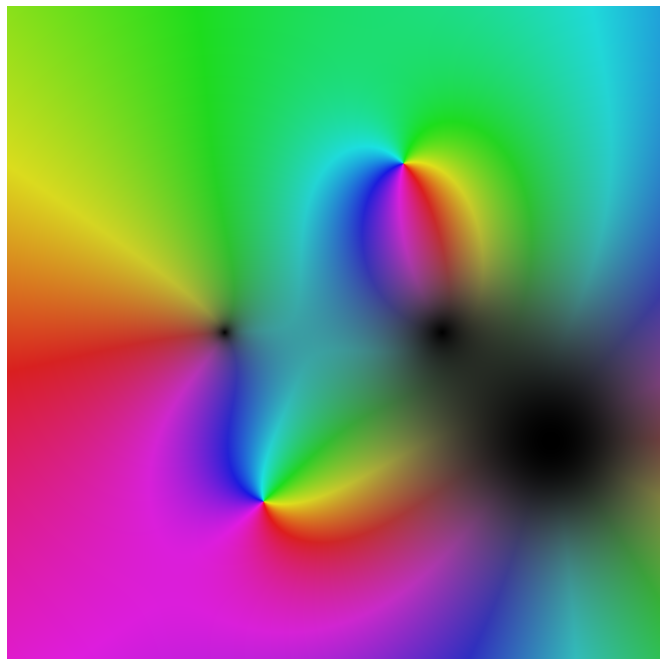

In [42]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_aspect('equal')
axes.axis('off')
axes.invert_yaxis()

axes.imshow(rgb)

plt.show()

## Choose another function for `S` and `V`

In [43]:
def create_color_model_2(z):
    """
    Create the HSV color model for the function domain that will be plotted
    """
    # Hue determined by arg(z)
    H = normalize(np.angle(z) % (2 * np.pi))
    r = np.log2(1 + np.abs(z))
    S = (1 + np.abs(np.sin(2 * np.pi * r))) / 2
    V = (1 + np.abs(np.cos(2 * np.pi * r))) / 2

    return H,S,V

In [44]:
H,S,V = create_color_model_2(zz)
rgb = hsv_to_rgb(np.dstack((H,S,V)))

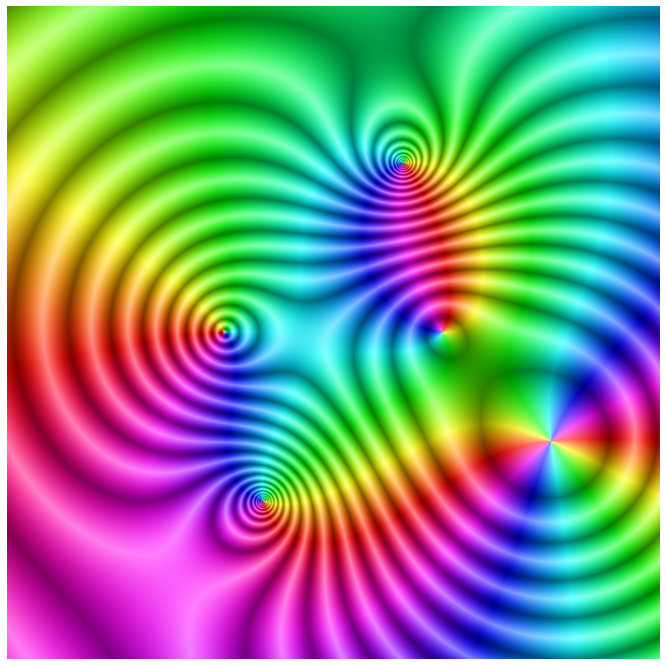

In [45]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_aspect('equal')
axes.axis('off')
axes.invert_yaxis()

axes.imshow(rgb)

plt.show()

## Julia sets

In [37]:
def f(zz, c):
    
    return  zz**2 + c

In [38]:
def iterate(zz, c, N=5):

    zz = f(zz, c)
    
    if N > 1:
        return iterate(zz, c, N-1)
    else:
        return zz

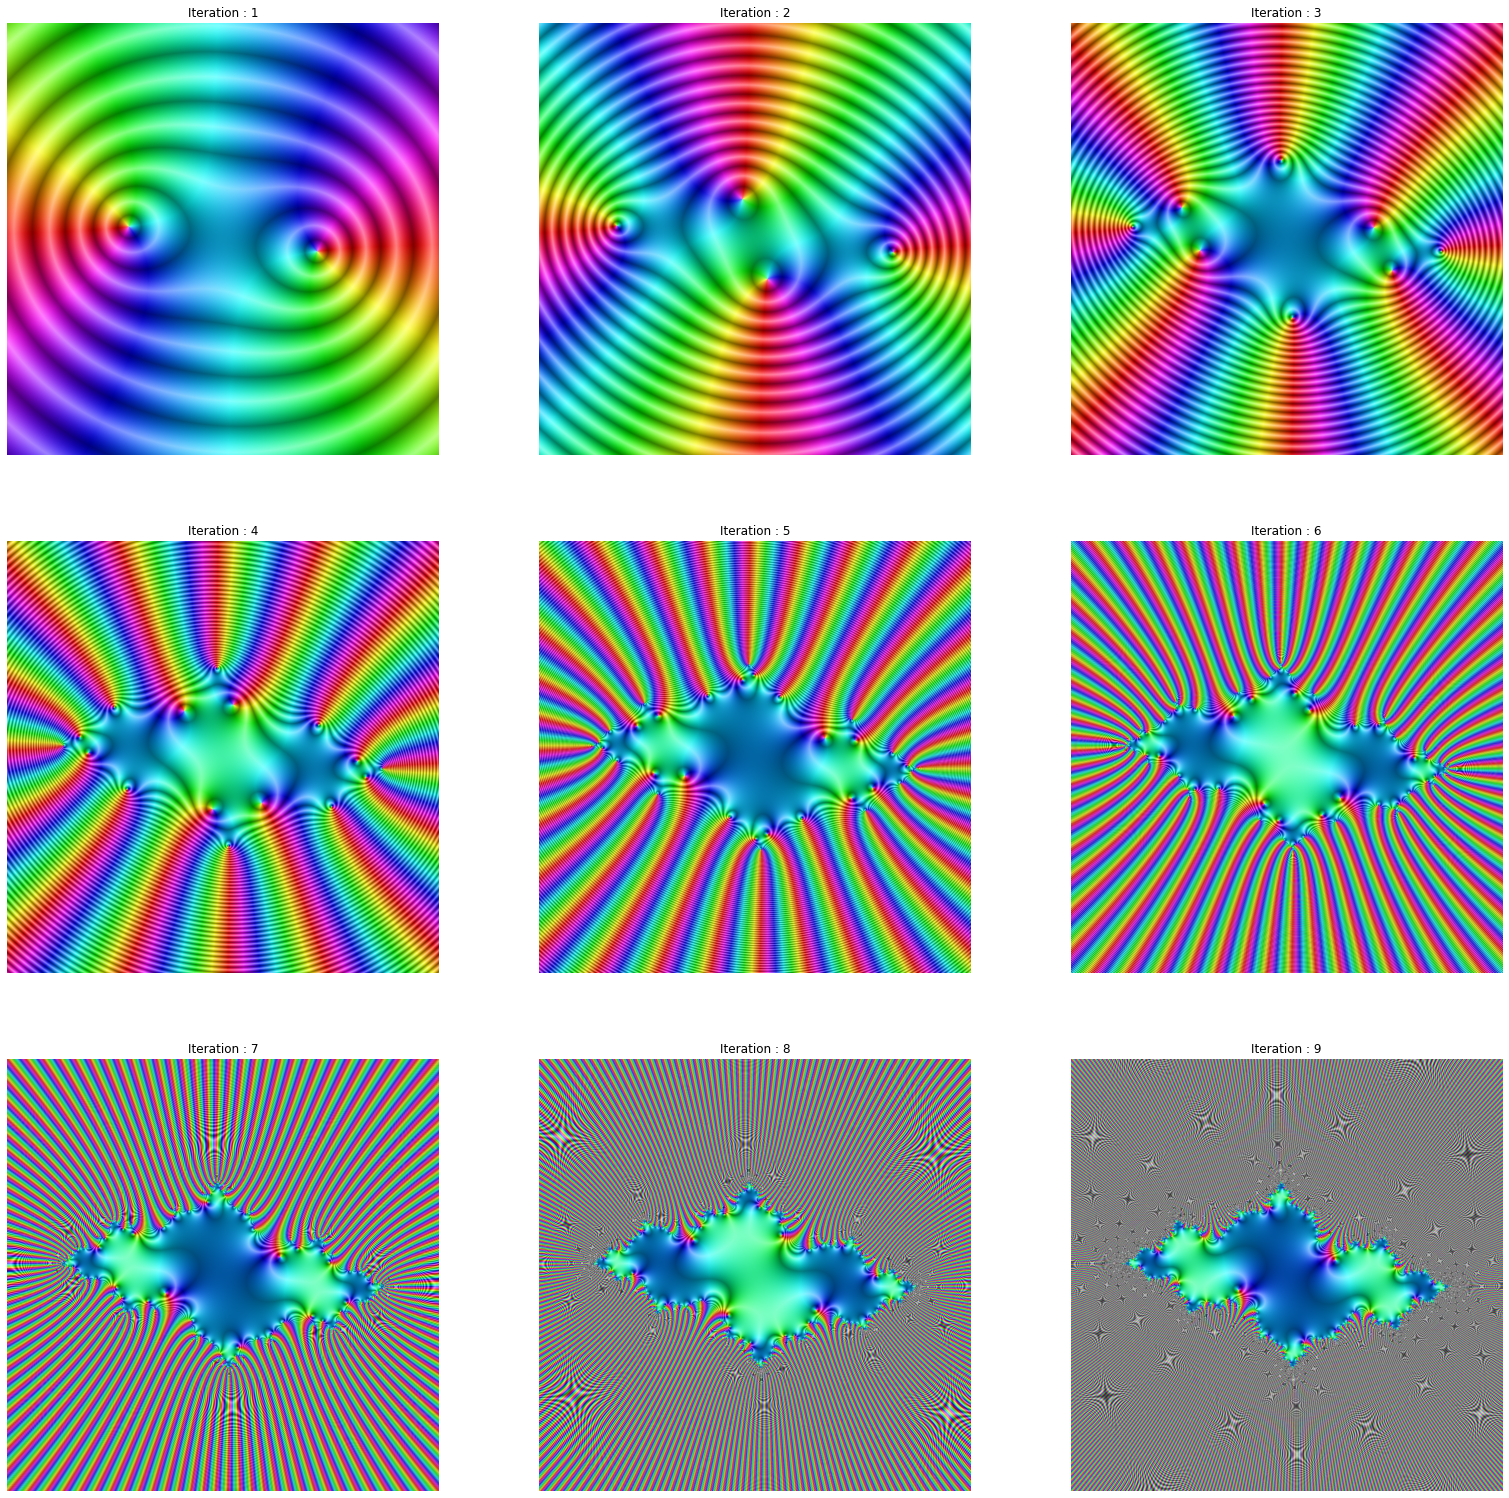

In [39]:
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*9,nrows*9))

for i in range(nrows):
    for j in range(ncols):
        ax = axes[i,j]
        ax.set_aspect('equal')
        ax.axis('off')
        ax.invert_yaxis()

        it = (i*ncols + j) + 1
        zz = create_domain(xy=2, N=1000)
        zz = iterate(zz, c=(-0.75 - 0.2j), N=it)
        H,S,V = create_color_model_2(zz)
        rgb = hsv_to_rgb(np.dstack((H,S,V)))
        
        ax.set_title('Iteration : {0}'.format(it))
        
        ax.imshow(rgb)

plt.show()